In [ ]:
import matplotlib.pyplot as plt
import numpy as np

d = np.arange(0, 5, 0.05)
f = 100*np.exp(-d*3)
plt.plot(d, f, label='f(x) = exp(x)')
plt.xlabel('distance')
plt.ylabel('v. linear')
plt.title('Exponential Growth')
plt.legend()



In [ ]:
#2D graph
from matplotlib import cm
d = np.arange(0, 9, 0.05)
lin_strength = 100
decay = 3
f = lin_strength*np.exp(-decay*d)

max_angle = np.pi/2
angle = np.arange(-np.pi/2, np.pi/2, np.pi/180)
g = (max_angle - np.abs(angle))/max_angle
X, Y = np.meshgrid(d, angle)
Z = X*Y

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


In [ ]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

# === PARAMETRI ===
bag_file = '/home/braingear/data/anna/2025-07-08-13-45-45.bag'
odom_topic = '/odometry/filtered'
tf_topic = '/tf'
tag_topic = '/tag_detections'
goal_topic = '/goal'


# === LEGGI DATI CON BAGPY ===
b = bagreader(bag_file)
csvfile_odom = b.message_by_topic(odom_topic)
csvfile_goal = b.message_by_topic(goal_topic)
csvfile_tf = b.message_by_topic(tf_topic)
csvfile_tag = b.message_by_topic(tag_topic)

# Legge il CSV
dfodom = pd.read_csv(csvfile_odom)
dfgoal = pd.read_csv(csvfile_goal)
dftf = pd.read_csv(csvfile_tf)
dftag = pd.read_csv(csvfile_tag)

In [ ]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

# === PARAMETRI ===
bag_file = '/home/braingear/anna_ws/solo_repulsori_profilo3/navigazione_attraverso_vari_goal2025-07-01-18-01-26.bag'
odom_topic = '/odometry/filtered'
pgm_map = '/home/braingear/anna_ws/map.pgm'
resolution = 0.025
origin = [-13.3, 2.8] #asse x verticale, asse y orizzontale   pos iniziale robot [-11.7, 2.4]
invert_y = True
invert_x = True

# === LEGGI DATI CON BAGPY ===
b = bagreader(bag_file)
csvfile_odom = b.message_by_topic(odom_topic)
csvfile_goal = b.message_by_topic('/goal')

# Legge il CSV
dfodom = pd.read_csv(csvfile_odom)
# Tipicamente le colonne si chiamano pose.pose.position.x e pose.pose.position.y
x_vals = dfodom['pose.pose.position.x'].values
y_vals = dfodom['pose.pose.position.y'].values

dfgoal = pd.read_csv(csvfile_goal)
x_goal = dfgoal['pose.position.x'].values
y_goal = dfgoal['pose.position.y'].values

# === CARICA MAPPA ===
map_img = cv2.imread(pgm_map, cv2.IMREAD_GRAYSCALE)

# === CONVERSIONE COORDINATE ===
def world_to_map_coords(x_world, y_world):
    mx = int((x_world - origin[0]) / resolution)
    my = int((y_world - origin[1]) / resolution)
    if invert_y:
        my = map_img.shape[0] - my
    if invert_x:
        mx = map_img.shape[1] - mx
    return my, mx

path_pixels = np.array([world_to_map_coords(x, y) for x, y in zip(x_vals, y_vals)])
goal_points = np.array([world_to_map_coords(x, y) for x,y in zip(x_goal, y_goal)])
tag_1 = world_to_map_coords(0,0)
path_pixels = path_pixels[::-1]
goal_points = goal_points[::-1]
# === PLOT ===
plt.figure(figsize=(10,10))
plt.imshow(map_img, cmap='gray')
#plt.plot(path_pixels[:,0], path_pixels[:,1], color='red', linewidth=2, label="path solo repulsori")
#plt.plot(goal_points[:,0], goal_points[:,1], 'go', markersize=10, label='Goals')
plt.plot(tag_1[0], tag_1[1], 'bo', markersize=10, label='Start Position')
#plt.plot(590,198, 'ro', markersize=10, label='Goal Position')
plt.title('Percorso odometria su mappa')
plt.legend()
plt.show()





In [ ]:
time = pd.to_datetime(df['header.stamp.secs']).astype(np.int64)
time -= time.iloc[0]  # parte da zero

# Estrai le velocità
v_x = df['twist.twist.linear.x']
w_z = df['twist.twist.angular.z']

# Plot velocità nel tempo
plt.figure(figsize=(12, 5))
plt.subplot(2,1,1)
plt.plot(time, v_x, label='Velocità lineare X (m/s)', color='blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità lineare X')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time, w_z, label='Velocità angolare Z (rad/s)', color='green')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità angolare Z')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
plt.boxplot([v_x, np.abs(w_z)], labels=['Linear X', 'Angular Z'])
plt.title('Boxplot velocità')
plt.ylabel('Valore')
plt.show()


In [ ]:
alpha = 0.8
sigma = 1.57
d = 2.3
d_safe = 0.5
s = np.cos(alpha)*np.sin(alpha)
lambda_ = 10*np.exp(-(d-d_safe)/0.7)
lambda_max = 10*np.exp(-(-d_safe)/0.7)
m = np.exp(-(alpha*alpha)/(2*sigma*sigma))

ang_vel = s*m*lambda_

print(f"m calcolato: {m:.4f}")
print(f"Lambda calcolato: {lambda_:.4f} m/s")
print(f"Velocità angolare calcolata: {ang_vel:.4f} rad/s")

vel_max = s*m*lambda_max
print(f"Velocità massima calcolata: {vel_max:.4f} m/s")

ang_vel_n = (2 * ((ang_vel - (-vel_max)) / (2 * vel_max)) - 1.0)
print(f"Velocità angolare normalizzata (-1,1): {ang_vel_n:.4f} rad/s")

In [ ]:
sigma = 1.57
d = 2.3
d_safe = 0.5
lambda_max = 10*np.exp(-(-d_safe)/0.7)
f = 0
for alpha in np.arange(0.0, 2*np.pi, np.pi/360):
    m = np.cos(alpha)*np.sin(alpha)*np.exp(-(alpha*alpha)/(2*sigma*sigma))
    f += np.abs(m)

vel_max = f*lambda_max
print(vel_max)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = [np.arange(-np.pi/2, 0, np.pi/180)]
vel_max = 1
sigma = 2*np.pi/3
beta = np.pi/4
q = np.exp(-(beta*beta)/(2*sigma*sigma))
all = []
for alpha in alphas:
    m = np.cos(alpha)*np.sin(alpha)*np.exp(-(alpha*alpha)/(2*sigma*sigma))
    all.append(m)
all = np.array(all)
#all.squeeze()
v_ = np.array(all) * vel_max * 2/(q*len(alphas))
print(v_)

In [ ]:
#plot alphas
plt.figure(figsize=(10, 5))
plt.scatter(alphas[0], v_[0], label='v_ vs alphas')
plt.xlabel('Alpha')
plt.ylabel('velocity')
plt.title('Velocity vs Alpha')
plt.xlim(-np.pi/2, np.pi/2)
plt.ylim(-vel_max, vel_max)
plt.legend()
plt.show()

In [ ]:
np.sum(v_)/ len(alphas[0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri iniziali
alpha = np.linspace(-np.pi, np.pi, 360)
distance = np.arange(0, 3.05, 0.05)  # fino a 3 incluso
sigma = [np.pi/6, np.pi/5, np.pi/4, np.pi/3, np.pi/2, 3*np.pi/4]
decay = 1.0
sigma0 = 2.0
sign = -1

max_velocity = 3.0
min_distance = 0.5


alpha0 = 0  # angolo fisso

# Scenario: 4 repulsori a destra
repellers_R = np.linspace(np.pi/8, 3*np.pi/8, 4)

omega_R = np.zeros_like(distance)

for ar in repellers_R:
    omega_R += sign*lambda_func(distance, min_distance, decay) * kernel(ar, sigma0)


# Normalizza
print("omega_R:", omega_R)
print(np.max(omega_R))
omega_R = max_velocity * omega_R / np.max(np.abs(omega_R))

# 3 repulsori a sinistra (angoli negativi)
repellers_L = np.linspace(-np.pi/2, -np.pi/8, 3)
omega_L = np.zeros_like(distance)

for ar in repellers_L:
    omega_L += lambda_func(distance, min_distance, decay) * kernel(alpha0 - ar, sigma0)


# Normalizza
omega_L = max_velocity * omega_L / np.max(np.abs(omega_L))

# ---------------------------------------------------
# Plot

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: kernel function con diversi sigma
ax = axs[0, 0]
for s in sigma:
    ax.plot(alpha, kernel(alpha, s), label=f'σ={s:.2f}')
ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(0, color='k', linewidth=0.5)
ax.set_xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['-π', '-3π/4', '-π/2', '-π/4', '0',  'π/4','π/2', '3π/4', 'π'])
ax.set_title("Kernel function")
ax.set_xlabel('angle (rad)')
ax.grid(True)
ax.legend()

# Subplot 2: lambda function
ax = axs[0, 1]
ax.plot(distance, lambda_func(distance, min_distance, decay))
ax.set_ylim([0, 1.5])
ax.axvline(min_distance, color='k', linestyle='--')
ax.set_title("lambda function")
ax.set_ylabel('lambda value')
ax.grid(True)

# Subplot 3: Surface 3D plot
from mpl_toolkits.mplot3d import Axes3D  # necessario per 3D
ax = fig.add_subplot(2, 2, 3, projection='3d')

AA, DD = np.meshgrid(alpha, distance)
KK = kernel(AA, sigma0)
LL = lambda_func(DD, min_distance, decay)
VV = max_velocity * KK * LL

surf = ax.plot_surface(AA, DD, VV, cmap='turbo', linewidth=0, antialiased=True)
ax.set_xlabel('angle (rad)')
ax.set_ylabel('distance (m)')
ax.set_zlabel('velocity (m/s)')
ax.set_title('3D Surface: V(α, d)')
ax.set_xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['-π', '-3π/4', '-π/2', '-π/4', '0',  'π/4','π/2', '3π/4', 'π'])
fig.colorbar(surf, shrink=0.5, aspect=10)

# Subplot 4: confronto omega
ax = axs[1, 1]
ax.plot(distance, omega_R, 'r-', linewidth=2, label='Destra (α > 0)')
ax.plot(distance, omega_L, 'b--', linewidth=2, label='Sinistra (α < 0)')
ax.axhline(0, color='k', linestyle=':')
ax.axvline(min_distance, color='k', linestyle='--')
ax.set_xlabel('distance [m]')
ax.set_ylabel('ω(0, d) [rad/s]')
ax.set_title('Confronto ω(0, d) con 4 repulsori a destra o 3 a sinistra (v_max=3.0)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
vel_max_q = 3
sigma = 2*np.pi/3
strength = vel_max_q/kernel(np.pi/4, sigma)
d1 = 1.7
d2 = 1
d3 = 0.5
min_distance = 0.5
decay = 0.7

In [ ]:
alphas = np.arange(-np.pi/2, 0, np.pi/180)
w1 = sign*lambda_func(d1, min_distance, decay)*kernel(alphas, sigma)*strength
w2 = sign*lambda_func(d2, min_distance, decay)*kernel(alphas, sigma)*strength
w3 = sign*lambda_func(d3, min_distance, decay)*kernel(alphas, sigma)*strength
plt.plot(alphas, w1, label='d1=1.7')
plt.plot(alphas, w2, label='d2=1')
plt.plot(alphas, w3, label='d3=0.5')
plt.legend()

In [ ]:
sum_w1 = np.sum(w1)
sum_w2 = np.sum(w2)
sum_w3 = np.sum(w3)
print(sum_w1)
print(sum_w2)
print(sum_w3)

In [ ]:
aa = [np.pi/4, np.pi/3]

v = 0
for a in aa:
    v += sign*lambda_func(d1, min_distance, decay)*kernel(a, sigma)*strength

v_att = lambda_func(d1, min_distance, decay)*kernel(np.pi/4, sigma)*strength

print(v)
print(v_att)
v+v_att
#proposta 1: la velocità massima è quella in pi/4 a d=dmin.. non ha molto senso perche poi la somma dei vari contributi ti porta ad avere valori alti o comunque non sono così facili da controllare

In [ ]:
vel_max_ang = 0.1 #scelta da me
sign = -1
sigma = np.pi
alphas = np.arange(-np.pi/2, 0, np.pi/180)
epsilon = 0

strength_rep = vel_max_ang/(sign*(kernel(-np.pi/4, sigma))) #tale velocità angolare massima è data dai contributi provenienti da q1 e q2
strength_att = (vel_max_ang-epsilon)/kernel(np.pi/4, sigma)

print("strength rep: ", strength_rep, "att: ",strength_att  )

a = -np.pi/4
v1 = sign*lambda_func(min_distance, min_distance, decay)*kernel(a, sigma)*strength_rep

b = np.pi/3
v2 = lambda_func(min_distance, min_distance, decay)*kernel(b, sigma)*strength_att

c = np.pi/2
v3 = sign*lambda_func(min_distance, min_distance, decay)*kernel(c, sigma)*strength_rep


print(v1+v2+v3)
#perc = 1/(eps+np.abs(a-b))
#v_att = v_att-(v_att*perc/100)
np.min([1, v1+v2+v3])

#proposta 2: setto una vel max del quadrante equivalente alla velocità con quadrante pieno a d=dmin. 
#in questo modo la velocità finale so che varia tra -6 e 6 sempre in ogni quadrante. 
#il rapporto atttr-repulsori è 1:1. 
#si dovrebbe moltiplicare l'attrattore per un numero x e poi togliere potenza man mano che repulsori si aggiungono al suo stesso quadrante

In [ ]:
#proposta 3:
# decido che la velocità max del quadrante è vel_max_q e si raggiunge a d=dmin in pi/4
#per ogni quadrante estraggo il valore massimo dei repulsori e degli attrattori e mi assicuo che con tale valore la sedia riesca a sfuggire propriamente
#oi sommo attr e repulsore
#in questo modo la relazione è 1:1 e in campo ho al più 4 rep e 1 attr e in un singolo quadrante ho 1 e 1.
#a questo punto posso effettivamente decidere la finale relazione attr-rep ad esempio 0.9:1 ...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def setKmax(kmax_points, t_rad=np.pi/180, sigma=2*np.pi/3):
        
        step = (90/5)*t_rad
        kMax = 0
        kPoints = []
        pt = None
        for i in np.arange(-np.pi/2, 0, step): #avanza di step gradi
            max_k = 0
            
            for j in np.arange(0, step, t_rad):    #avanza di 1 grado 
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
                    pt = i+j
            
            kPoints.append(pt)
            kMax+= max_k


        kmax_points.append(kPoints)
        kPoints = []

        for i in np.arange(np.pi/2, np.pi, step):
            max_k = 0
            for j in np.arange(0, step, t_rad):
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
                    pt = i+j

            kPoints.append(pt)    
            kMax += max_k


        kmax_points.append(kPoints)
        return kMax


In [ ]:
points = []
sigma=2*np.pi/3
kmax = setKmax(points, np.pi/180, sigma)



In [ ]:
k_=0
for q in points:
    for pt in q:
        k_ += np.abs(kernel(pt, sigma))

print(k_)

In [ ]:
6 < np.inf

In [ ]:
#crea un vettore di 360 distanze random comprese tra 0.5 e 3 e con qualche valore a +infinito

polar_map = np.array([random.uniform(0.5, 3) for x in range(0, 360)])
t_rad=np.pi/180
step = 90/5
for i in np.arange(0, len(polar_map), step): 
            min_dist = np.inf
            index = 0
            for j in np.arange(step):
            
                d = polar_map[int(i+j)]
                if d <= min_dist:
                    if kernel(i+j, sigma) < kernel(index, sigma):
                     
                        continue
                  
                    min_dist = d
                    index = i+j

In [ ]:
def setKmax():
        t_rad = np.pi/180
        step = (360/20)*t_rad
        kMax = []
        for i in np.arange(0, np.pi/2, step): 
            max_k = 0
            for j in np.arange(0, step, t_rad):    
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
            
                
            kMax.append( max_k)

        for i in np.arange(-np.pi, -np.pi/2, step):
            
            max_k = 0
            for j in np.arange(0, step, t_rad):
                
                k = np.abs(kernel(i+j, sigma))
                if k > max_k:
                    max_k = k
                
            kMax.append(max_k)

        return kMax
#trovare i punti max di ogni quadrnte
#trovare kmax


In [ ]:
alphas = setKmax()
alphas = np.array(alphas)
d = [0.5, 0.5, 0.5, 0.5, 0.5]


v_ = 0
for i in np.arange(len(alphas)):
    m = kernel(alphas[i], sigma)*lambda_func(d[i], min_distance, decay)*-1
    v_+=(m)*20/(2*setKmax())

v_

In [ ]:
def setVelocity():
    omega_rep = 0
    for obj in ap_field:
        v = obj[2]*lambda_func(obj[1], min_distance, decay)*kernel(obj[0], sigma)
        v = (v*2*nsett)/kmax
        omega_rep+=v

    omega_attr = 0
    if(new_goal):
        omega_attr = lambda_func(obj[1], min_distance, decay)*kernel(obj[0], sigma)
        omega_attr = (delta*omega_attr*2*nsett)/kmax

    omega = omega_rep + omega_attr
    return omega


In [ ]:
#!/usr/bin/env python3

import rosbag
import numpy as np
import cv2

# === Parametri mappa ===
pgm_map = '/home/braingear/anna_ws/map.pgm'
resolution = 0.025
origin = (-13.3, 2.8)  # posizione nota di tag_1
invert_y = True
invert_x = True

# === Leggi immagine della mappa ===
map_img = cv2.imread(pgm_map, cv2.IMREAD_GRAYSCALE)

def world_to_map_coords(x_world, y_world):
    mx = int((x_world - origin[0]) / resolution)
    my = int((y_world - origin[1]) / resolution)
    if invert_y:
        my = map_img.shape[0] - my
    if invert_x:
        mx = map_img.shape[1] - mx
    return my, mx

# === Variabili ===
goals = []
odoms = []
odom_to_tag = None

# === Apri bag ===
bag = rosbag.Bag('/home/braingear/data/anna/2025-07-08-15-07-53.bag', 'r')

for topic, msg, t in bag.read_messages(topics=['goal', 'odometry/filtered', '/tf']):
    if topic == '/tf':
        for transform in msg.transforms:
            # Se troviamo la trasformazione odom -> tag_1, prendiamola solo la prima volta
            if transform.child_frame_id == 'tag_1' and transform.header.frame_id == 'odom':
                odom_to_tag = transform
    elif topic == '/goal' and odom_to_tag is not None:
        print('ok')
        pose = msg.pose
        dx = odom_to_tag.transform.translation.x
        dy = odom_to_tag.transform.translation.y
        x = pose.position.x + dx
        y = pose.position.y + dy
        goals.append((x, y))
    elif topic == '/odometry/filtered' and odom_to_tag is not None:
        print('ok')
        pose = msg.pose.pose
        dx = odom_to_tag.transform.translation.x
        dy = odom_to_tag.transform.translation.y
        x = pose.position.x + dx
        y = pose.position.y + dy
        odoms.append((x, y))

bag.close()

print(f"[INFO] Lettura completata: {len(goals)} goals, {len(odoms)} odometrie")

# === Converto in pixel ===
goal_pixels = [world_to_map_coords(x, y) for (x, y) in goals]
odom_pixels = [world_to_map_coords(x, y) for (x, y) in odoms]

# === Disegno ===
map_rgb = cv2.cvtColor(map_img, cv2.COLOR_GRAY2BGR)

for my, mx in goal_pixels:
    cv2.circle(map_rgb, (mx, my), 3, (0, 0, 255), -1)

for my, mx in odom_pixels:
    cv2.circle(map_rgb, (mx, my), 1, (255, 0, 0), -1)

cv2.imshow("Map with trajectories", map_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


[INFO] Lettura completata: 0 goals, 0 odometrie


In [3]:
#!/usr/bin/env python3

import rosbag
import numpy as np
import cv2

# === Parametri mappa ===
pgm_map = '/home/braingear/anna_ws/map.pgm'
resolution = 0.025
origin = (-13.3, 2.8)  # posizione nota di tag_1
invert_y = True
invert_x = True

# === Leggi immagine della mappa ===
map_img = cv2.imread(pgm_map, cv2.IMREAD_GRAYSCALE)

def world_to_map_coords(x_world, y_world):
    mx = int((x_world - origin[0]) / resolution)
    my = int((y_world - origin[1]) / resolution)
    if invert_y:
        my = map_img.shape[0] - my
    if invert_x:
        mx = map_img.shape[1] - mx
    return my, mx

# === Variabili ===
goals = []
odoms = []
odom_to_tag = None

# === Apri bag ===
bag = rosbag.Bag('/home/braingear/data/anna/2025-07-08-15-07-53.bag', 'r')

for topic, msg, t in bag.read_messages(topics=['goal', 'odometry/filtered']):
    print(topic)
    print(topic=="/tf")
    print(msg)

In [1]:
import numpy as np
# Funzioni kernel e lambda
def kernel(a, s):
    return np.sin(a) * np.cos(a) * np.exp(- (a**2) / (2 * s**2))

def lambda_func(d, dmin, decay):
    return np.where(d < dmin, 1, np.exp(- (d - dmin) / decay))

In [ ]:
import bagpy
from bagpy import bagreader
import pandas as pd

# === PARAMETRI ===
bag_file = '/home/braingear/data/anna/2025-07-11-12-33-52.bag'
topic = '/apf'


# === LEGGI DATI CON BAGPY ===
b = bagreader(bag_file)
apf_csv = b.message_by_topic(topic)
dfapf = pd.read_csv(apf_csv)

[INFO]  Successfully created the data folder /home/braingear/data/anna/2025-07-11-12-33-52.


In [54]:
#[0,1,2,3,4,5,.....,95,96,97,98] = [-4.9, -4.8, -4.7, ..., 4.7, 4.8, 4.9] x
#[0,1,2,3,4,5,.....,95,96,97,98] = [-4.9, -4.8, -4.7, ..., 4.7, 4.8, 4.9] y

objs = [[1.7, 0.9], [2,2.4], [-1.2, -1.6], [-2, 0.7]]
sigma = 1.57
decay = 0.7

matrix = np.zeros((99, 99))
matrice_xy = np.zeros((99, 99))
for obj in objs:
    for i in np.arange(0, 99, 1):
        for j in np.arange(0, 99, 1):
            cell_x = -(i - 49)*0.1
            cell_y = -(j - 49)*0.1
            cell_obj_x = cell_x - obj[0]
            cell_obj_y = cell_y - obj[1]
            angle = np.arctan2(cell_obj_y, cell_obj_x)
            distance = np.sqrt(cell_obj_x**2 + cell_obj_y**2)
            v = -1*kernel(angle, sigma)*lambda_func(distance, 0, decay)
            matrix[i][j] += v
            matrice_xy[i][j] = cell_x

In [31]:
print(matrice_xy)

[[ 4.9  4.9  4.9 ...  4.9  4.9  4.9]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 ...
 [-4.7 -4.7 -4.7 ... -4.7 -4.7 -4.7]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]]


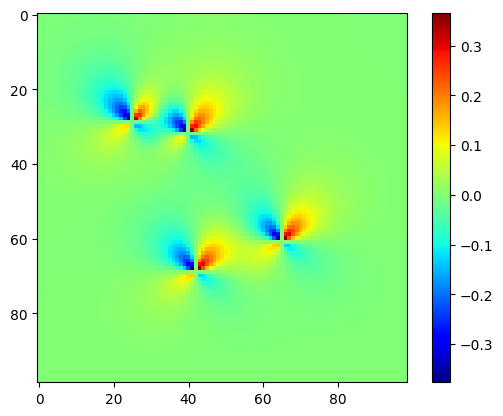

In [55]:
#print matrix with colors

import matplotlib.pyplot as plt
import matplotlib.cm as cm
#flip x and y axis
#matrix1 = np.flip(matrix, axis=0)
#plt.plot(obj_x, obj_y, 'ro', markersize=10, label='Object Position')
plt.imshow(matrix, cmap=cm.jet)
plt.colorbar()
plt.show()

Matrice letta dal file:
[[-0.218354 -0.218305 -0.21825  ... -0.218695 -0.218693 -0.218691]
 [-0.218307 -0.218249 -0.218184 ... -0.218699 -0.218696 -0.218694]
 [-0.218256 -0.218188 -0.218111 ... -0.218703 -0.218699 -0.218697]
 ...
 [-0.219078 -0.219098 -0.219116 ... -0.216246 -0.216668 -0.217019]
 [-0.219017 -0.219035 -0.219053 ... -0.216398 -0.216789 -0.217114]
 [-0.218966 -0.218984 -0.219001 ... -0.216556 -0.216914 -0.217214]]


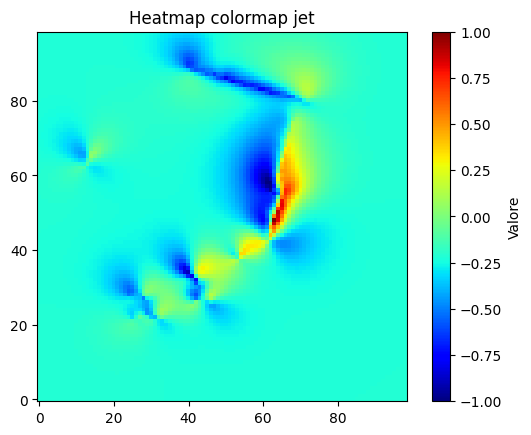

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi la matrice dal file txt
# Supponiamo che sia separata da spazi, come l'output di Eigen
# Se usi CSV (con virgole), cambia delimiter=","
mat = np.loadtxt("/mnt/data/anna/anna_ws/matrice_norm.csv", delimiter=",")

# Stampa per controllo
print("Matrice letta dal file:")
print(mat)

# Visualizza l'immagine con colormap 'jet'
plt.imshow(mat, cmap='jet', origin='lower')  # origin='lower' per avere l'origine in basso a sinistra
plt.colorbar(label='Valore')
plt.title("Heatmap colormap jet")
plt.show()


Matrice letta dal file:
[[ 1.55425e-03  1.79154e-03  2.05706e-03 ... -9.13053e-05 -8.11006e-05
  -7.19344e-05]
 [ 1.77953e-03  2.05949e-03  2.37452e-03 ... -1.06402e-04 -9.44537e-05
  -8.37213e-05]
 [ 2.02769e-03  2.35636e-03  2.72835e-03 ... -1.23954e-04 -1.09962e-04
  -9.73939e-05]
 ...
 [-1.85807e-03 -1.94168e-03 -2.01724e-03 ...  1.09247e-02  9.02495e-03
   7.44811e-03]
 [-1.57181e-03 -1.65015e-03 -1.72567e-03 ...  1.02406e-02  8.48352e-03
   7.01968e-03]
 [-1.33843e-03 -1.41336e-03 -1.48961e-03 ...  9.53294e-03  7.92037e-03
   6.57171e-03]]


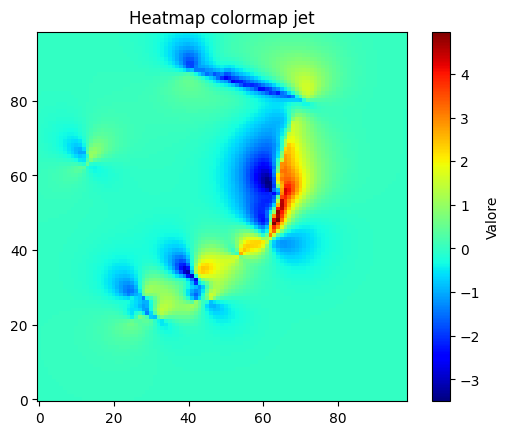

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi la matrice dal file txt
# Supponiamo che sia separata da spazi, come l'output di Eigen
# Se usi CSV (con virgole), cambia delimiter=","
mat = np.loadtxt("/mnt/data/anna/anna_ws/matrice.csv", delimiter=",")

# Stampa per controllo
print("Matrice letta dal file:")
print(mat)

# Visualizza l'immagine con colormap 'jet'
plt.imshow(mat, cmap='jet', origin='lower')  # origin='lower' per avere l'origine in basso a sinistra
plt.colorbar(label='Valore')
plt.title("Heatmap colormap jet")
plt.show()
